In [1]:
import pandas as pd
import numpy as np
from random import choice  
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [2]:
def create_points():
    n=5
    x = np.linspace(0,9,n)
    y2 = x*x - 10*x+2 + np.random.randn(n)# 构造函数
    return x,y2

In [3]:
def create_test():
    n=150
    xtest = np.linspace(0,9,n)
    ytest = xtest*xtest - 10*xtest + 2 + np.random.randn(n)# x^2 + x +2 
    return xtest,ytest

In [4]:
def ploy_info():
    poly1 = PolynomialFeatures(1)
    poly2 = PolynomialFeatures(2)
    polym = PolynomialFeatures(7)
    return poly1,poly2,polym

In [ ]:
[x1,x2] -> [1,x1,x2,x1^2,x1*x2,x2^2]

In [8]:
xtrain,ytrain=create_points()
xtest,ytest = create_test()

In [9]:
poly1,poly2,polym = ploy_info()

In [11]:
## 一阶
xtrain_ploy1 = poly1.fit_transform(xtrain.reshape(-1,1))

linemodel_ploy1 = LinearRegression()

linemodel_ploy1.fit(xtrain_ploy1,ytrain) # train

ploy1_pred = linemodel_ploy1.predict(poly1.transform(xtest.reshape(-1,1)))

In [12]:
# 二阶
xtrain_ploy2 = poly2.fit_transform(xtrain.reshape(-1,1))

linemodel_ploy2 = LinearRegression()

linemodel_ploy2.fit(xtrain_ploy2,ytrain)

ploy2_pred = linemodel_ploy2.predict(poly2.transform(xtest.reshape(-1,1)))

In [13]:
# 多阶
xtrain_polym = polym.fit_transform(xtrain.reshape(-1,1))

linemodel_polym = LinearRegression()

linemodel_polym.fit(xtrain_polym,ytrain)

polym_pred = linemodel_polym.predict(polym.transform(xtest.reshape(-1,1)))

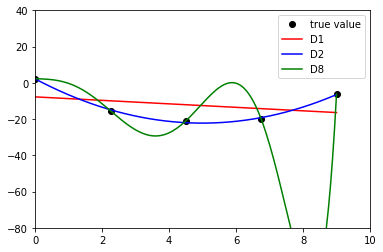

In [14]:
plt0,  = plt.plot(xtrain,ytrain,'ko',label="true value")
plt1,  = plt.plot(xtest,ploy1_pred,'r',label="D1")
plt2,  = plt.plot(xtest,ploy2_pred,'b',label="D2")
plt3,  = plt.plot(xtest,polym_pred,'g',label="D8")


plt.legend(handles=[plt0, plt1, plt2, plt3])
plt.axis([0, 10, -80, 40])
plt.show()

In [35]:
## 正则化效果

In [17]:
alpha=500
max_iter=40000

In [18]:
# Ridge
xtrain_polym = polym.fit_transform(xtrain.reshape(-1,1))

Ridge_polym = Ridge(alpha=alpha,max_iter=max_iter)

Ridge_polym.fit(xtrain_polym,ytrain)

Ridge_pred = Ridge_polym.predict(polym.transform(xtest.reshape(-1,1)))

In [19]:
# LASSO
xtrain_polym = polym.fit_transform(xtrain.reshape(-1,1))

Lasso_polym = Lasso(alpha=alpha,max_iter=max_iter)

Lasso_polym.fit(xtrain_polym,ytrain)

Lasso_pred = Lasso_polym.predict(polym.transform(xtest.reshape(-1,1)))

In [20]:
# ElasticNet
xtrain_polym = polym.fit_transform(xtrain.reshape(-1,1))

ElasticNet_polym = ElasticNet(alpha=alpha,max_iter=max_iter,l1_ratio=0.2)

ElasticNet_polym.fit(xtrain_polym,ytrain)

ElasticNet_pred = ElasticNet_polym.predict(polym.transform(xtest.reshape(-1,1)))

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


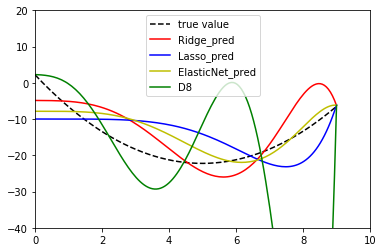

In [21]:
plt0,  = plt.plot(xtest,ploy2_pred,'k--',label="true value")
plt1,  = plt.plot(xtest,Ridge_pred,'r',label="Ridge_pred")
plt2,  = plt.plot(xtest,Lasso_pred,'b',label="Lasso_pred")
plt3,  = plt.plot(xtest,ElasticNet_pred,'y',label="ElasticNet_pred")
plt4,  = plt.plot(xtest,polym_pred,'g',label="D8")

plt.legend(handles=[plt0, plt1, plt2, plt3, plt4])
plt.axis([0, 10, -40, 20])
plt.show()

In [24]:
LinearRegression?